<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/CIFAR_CNN_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()


In [2]:
from keras.datasets import cifar10
import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

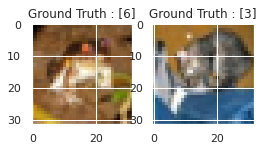

In [7]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

In [8]:
# Prepare data for training
nRows,nCols,nDims=x_train.shape[1:]

In [9]:
# Make all images of same shape and size
x_train=x_train.reshape(x_train.shape[0],nRows,nCols,nDims)
x_test=x_test.reshape(x_test.shape[0],nRows,nCols,nDims)

In [10]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [11]:
# Scale the data
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [12]:
np.max(x_train[0]),np.min(x_train[0])

(255.0, 0.0)

In [13]:
# Scale the data
x_train=x_train/255
x_test=x_test/255

In [14]:
np.max(x_train[0]),np.min(x_train[0])

(1.0, 0.0)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train_labels=to_categorical(y_train)
y_test_labels=to_categorical(y_test)

In [17]:
y_train_labels.shape

(50000, 10)

In [18]:
y_train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [19]:
y_train[0]

array([6], dtype=uint8)

In [20]:
from keras.layers import Conv2D,Flatten

def __init__(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)

In [21]:
x_train[0].shape

(32, 32, 3)

In [22]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(32,(3,3),padding='valid',activation='relu'))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               14746112  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 14,761,386
Trainable params: 14,761,386
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train_labels,epochs=5,batch_size=512,verbose=1,validation_data=(x_test,y_test_labels))

Epoch 1/5
98/98 [==============================] - 35s 75ms/step - loss: 2.1415 - accuracy: 0.3510 - val_loss: 1.5154 - val_accuracy: 0.4569
Epoch 2/5
98/98 [==============================] - 7s 68ms/step - loss: 1.4394 - accuracy: 0.4992 - val_loss: 1.2800 - val_accuracy: 0.5380
Epoch 3/5
98/98 [==============================] - 7s 68ms/step - loss: 1.2085 - accuracy: 0.5783 - val_loss: 1.1736 - val_accuracy: 0.5898
Epoch 4/5
98/98 [==============================] - 7s 68ms/step - loss: 1.0231 - accuracy: 0.6449 - val_loss: 1.2443 - val_accuracy: 0.5641
Epoch 5/5
98/98 [==============================] - 7s 69ms/step - loss: 0.8733 - accuracy: 0.6980 - val_loss: 1.5757 - val_accuracy: 0.4983


In [26]:
model.evaluate(x_test,y_test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 1.5757 - accuracy: 0.4983


[1.5757131576538086, 0.4982999861240387]

In [27]:
from keras.preprocessing.image import ImageDataGenerator

In [28]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(32,(3,3),padding='valid',activation='relu'))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [29]:
datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True)

In [32]:
hostory2=model.fit_generator(datagen.flow(x_train,y_train_labels),steps_per_epoch=10,epochs=100,validation_data=(x_test,y_test_labels))

Epoch 1/100
 7/10 [====================>.........] - ETA: 0s - loss: 1.3249 - accuracy: 0.5357

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


10/10 [==============================] - 2s 166ms/step - loss: 1.3051 - accuracy: 0.5437 - val_loss: 1.5371 - val_accuracy: 0.4677
Epoch 2/100
10/10 [==============================] - 2s 165ms/step - loss: 1.3762 - accuracy: 0.5656 - val_loss: 1.3628 - val_accuracy: 0.5106
Epoch 3/100
10/10 [==============================] - 2s 165ms/step - loss: 1.3540 - accuracy: 0.4781 - val_loss: 1.3615 - val_accuracy: 0.5126
Epoch 4/100
10/10 [==============================] - 2s 167ms/step - loss: 1.3888 - accuracy: 0.5125 - val_loss: 1.3440 - val_accuracy: 0.5188
Epoch 5/100
10/10 [==============================] - 2s 165ms/step - loss: 1.4172 - accuracy: 0.5281 - val_loss: 1.3585 - val_accuracy: 0.5066
Epoch 6/100
10/10 [==============================] - 2s 166ms/step - loss: 1.3221 - accuracy: 0.5125 - val_loss: 1.4639 - val_accuracy: 0.4780
Epoch 7/100
10/10 [==============================] - 2s 168ms/step - loss: 1.3806 - accuracy: 0.5000 - val_loss: 1.3564 - val_accuracy: 0.5163
Epoch 8/100

In [ ]:
# Add maxpooling layers
# Add dropouts
# Create Dense layers

# Experiments
# Change filter size(big/small)
# Change dense layer size
# Batch Normalization
# Batch Normalization with Dropouts


# RESNET

In [33]:
from keras.callbacks import ModelCheckpoint

In [44]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]
model.fit(x_train,
          y_train_labels,
          epochs=5,
          callbacks=callbacks,validation_data=(x_test,y_test_labels))

Epoch 1/5
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7523 - accuracy: 0.7478 - val_loss: 1.2628 - val_accuracy: 0.5879

Epoch 00001: val_loss improved from inf to 1.26276, saving model to my_best_model.epoch01-loss1.26.hdf5
Epoch 2/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5238 - accuracy: 0.8278 - val_loss: 1.6076 - val_accuracy: 0.5854

Epoch 00002: val_loss did not improve from 1.26276
Epoch 3/5
 352/1563 [=====>........................] - ETA: 22s - loss: 0.3021 - accuracy: 0.9010

In [ ]:
ModelCheckpoint


def inference(image,model):

script->
python inference.py --input image.jpg
CAR